### Exploratory Data Analysis
### Data Pre-Processing

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [5]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [6]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [8]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [9]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [10]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [11]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [12]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [13]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [14]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

In [28]:
#Joining matches and deliveries data after cleaning
df_total = pd.merge(df_matches, df_deliveries, left_on='id',right_on='match_id', how='outer')

### Q1) Who will win today match DC vs SRH?

In [93]:
#First Lets see head-head results
df_SRH_DC = df_matches[((df_matches['team1'] == 'Delhi Capitals') | (df_matches['team1'] == 'Sunrisers Hyderabad')) & 
                        ((df_matches['team2'] == 'Delhi Capitals') | (df_matches['team2'] == 'Sunrisers Hyderabad'))] 

#plotting SRH and DC wins against each other
import plotly.graph_objs as go
df_winner = df_SRH_DC[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by DC and SRH against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

SRH won more matches than DC in head-head matches. But IPL team will change every two years, So lets look at individual player performance in IPL as well.

In [95]:
#Lets look at how many player of the match awards won by current DC and SRH players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_SRH = df_matches[(df_matches['player_of_match'] == 'DA Warner') | (df_matches['player_of_match'] == 'J Bairstow') |
                                (df_matches['player_of_match'] == 'MK Pandey') | (df_matches['player_of_match'] == 'Rashid Khan') |
                                (df_matches['player_of_match'] == 'S Sharma') | (df_matches['player_of_match'] == 'K Ahmed') |
                                (df_matches['player_of_match'] == 'JO Holder') | (df_matches['player_of_match'] == 'V Shankar')]


print("Total number of man of matches won by SRH players is", df_man_of_match_SRH.shape[0],"\n")       

df_man_of_match_DC = df_matches[(df_matches['player_of_match'] == 'AM Rahane') | (df_matches['player_of_match'] == 'S Dhawan') |
                                (df_matches['player_of_match'] == 'SS Iyer') | (df_matches['player_of_match'] == 'RR Pant') |
                                (df_matches['player_of_match'] == 'R Ashwin') | (df_matches['player_of_match'] == 'K Rabada') |
                                (df_matches['player_of_match'] == 'AR Patel') | (df_matches['player_of_match'] == 'MP Stoinis')]

print("Total number of man of matches won by Delhi players", df_man_of_match_DC.shape[0])

Total number of man of matches won by SRH players is 31 

Total number of man of matches won by Delhi players 37


DC players won more match awards than SRH players. 

So i can say DC has more match winners than SRH. So i am predicting DC will win today match.

### Q2) How many runs will be scored totally in the match?

In [23]:
df_DCSRH = df_deliveries[((df_deliveries['batting_team'] == 'Delhi Capitals') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')) |
                         ((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Delhi Capitals'))] 

df_DCSRH.head(2)

total_runs = df_DCSRH.groupby('match_id')['total_runs'].sum() 
df_total_runs = total_runs.to_frame().reset_index()
df_total_runs.head()                

,match_id,total_runs
0,21,367
1,39,374
2,394,229
3,428,161
4,469,364


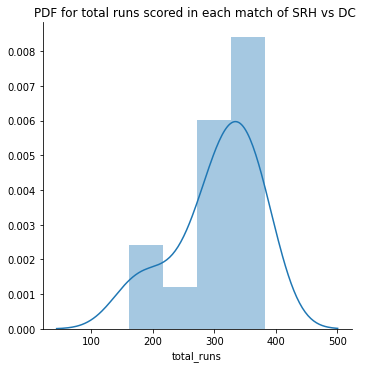

count     15.000000
mean     304.533333
std       67.203175
min      161.000000
25%      280.500000
50%      320.000000
75%      352.500000
max      383.000000
Name: total_runs, dtype: float64

In [25]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_total_runs,size=5) \
   .map(sns.distplot, "total_runs") \
   .add_legend();

plt.title("PDF for total runs scored in each match of SRH vs DC ")
plt.show();
df_total_runs['total_runs'].describe()

The probability is very high for runs between 320 to 340 and 75% values are less than 352 runs.

### Q3) How many such dismissals will occur in the match where batsman gets out caught including caught and bowled?

I am looking individual team dismissals against all teams in last two years because from 2018 onwards DC and SRH teams are almost have same squad. 

So that i can get more data and also i can get more accurate results instead of checking only SRH vs DC matches.

In [39]:
#First calculating DC innings caught outs against all teams in last two years 
df_DC_caught = df_total[(df_total['batting_team'] == 'Delhi Capitals') & (df_total['season'] >= 2018) &
                        ((df_total['dismissal_kind'] == 'caught') | (df_total['dismissal_kind'] == 'caught and bowled'))] 

#Calculating number of caught outs when DC was batting in last 2years
total_caught_outs = df_DC_caught.groupby('match_id')['dismissal_kind'].count()
df_total_caughts_DC = total_caught_outs.to_frame().reset_index()
df_total_caughts_DC.rename(columns = {'dismissal_kind': 'DC_total_caught_outs'}, inplace=True)
df_total_caughts_DC.head(2)                           

,match_id,DC_total_caught_outs
0,7895,3
1,7899,3


In [40]:
#Nowcalculating SRH innings caught outs against all teams in last two years 
df_SRH_caught = df_total[(df_total['batting_team'] == 'Sunrisers Hyderabad') & (df_total['season'] >= 2018) &
                        ((df_total['dismissal_kind'] == 'caught') | (df_total['dismissal_kind'] == 'caught and bowled'))] 

#Calculating number of caught outs when SRH was batting in last 2years
total_caught_outs = df_SRH_caught.groupby('match_id')['dismissal_kind'].count()
df_total_caughts_SRH = total_caught_outs.to_frame().reset_index()
df_total_caughts_SRH.rename(columns = {'dismissal_kind':'SRH_total_caught_outs'}, inplace=True)
df_total_caughts_SRH.head(2) 

,match_id,SRH_total_caught_outs
0,7897,1
1,7900,7


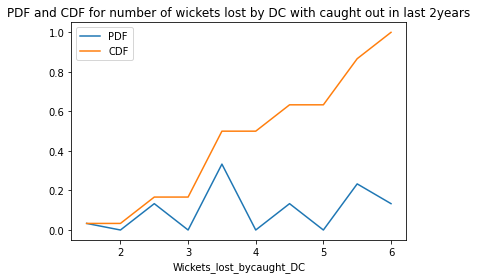

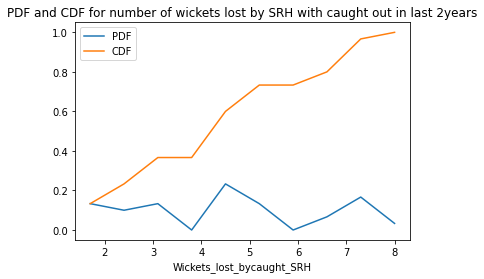

In [45]:
#Cumulative sum of area under curve upto gives you cdf
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_total_caughts_DC['DC_total_caught_outs'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('Wickets_lost_bycaught_DC')
plt.title("PDF and CDF for number of wickets lost by DC with caught out in last 2years")
plt.show();

counts, bin_edges = np.histogram(df_total_caughts_SRH['SRH_total_caught_outs'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('Wickets_lost_bycaught_SRH')
plt.title("PDF and CDF for number of wickets lost by SRH with caught out in last 2years")
plt.show();

**Conclusion :-**



1.   By observing above both plots by using CDF i can say 60% of the caught outs are less than 4 per innings.
2.   By using PDF i can say Mean of DC caught outs is 3.5 and SRH is 4.5.

So according to above analysis DC will loose 3 wickets by caught and SRH will loose 4 wickets by caught.

So total in the match 7 dismissals will occur by caught. In the given i am choosing 4-7.



### Q4) How many more/less runs will SRH score in the first 6 overs?

In [56]:
#First filtering DC vs SRH matches
df_DCSRH = df_deliveries[((df_deliveries['batting_team'] == 'Delhi Capitals') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')) |
                         ((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Delhi Capitals'))] 

#Calcualting DC runs in first 6 overs in every match against SRH.
df_DC_powerplay = df_DCSRH[(df_DCSRH['batting_team'] == 'Delhi Capitals') & (df_DCSRH['over'] <= 6)]
runs_scored_powerplay = df_DC_powerplay.groupby('match_id')['total_runs'].sum()
df_runscored_PP_DC = runs_scored_powerplay.to_frame().reset_index()
df_runscored_PP_DC.rename(columns = {'total_runs':'runs_scored_poweplay_DC'}, inplace=True)
df_runscored_PP_DC.head(2)

,match_id,runs_scored_poweplay_DC
0,21,56
1,39,62


In [57]:
#Now Calcualting SRH runs in first 6 overs in every match against DC.
df_SRH_powerplay = df_DCSRH[(df_DCSRH['batting_team'] == 'Sunrisers Hyderabad') & (df_DCSRH['over'] <= 6)]
runs_scored_powerplay = df_SRH_powerplay.groupby('match_id')['total_runs'].sum()
df_runscored_PP_SRH = runs_scored_powerplay.to_frame().reset_index()
df_runscored_PP_SRH.rename(columns = {'total_runs':'runs_scored_poweplay_SRH'}, inplace=True)
df_runscored_PP_SRH.head(2)

,match_id,runs_scored_poweplay_SRH
0,21,39
1,39,66


In [64]:
#Joining above two dataframes by match_id
df_DCSRH_powerplay = pd.merge(df_runscored_PP_DC, df_runscored_PP_SRH, left_on='match_id',right_on='match_id', how='outer')

#Taking difference in runs for each match in Powerplay(PP)
df_DCSRH_powerplay['difference_in_runs'] = abs(df_DCSRH_powerplay['runs_scored_poweplay_DC'] - df_DCSRH_powerplay['runs_scored_poweplay_SRH'])
df_DCSRH_powerplay.head(2)


,match_id,runs_scored_poweplay_DC,runs_scored_poweplay_SRH,difference_in_runs
0,21,56,39,17
1,39,62,66,4


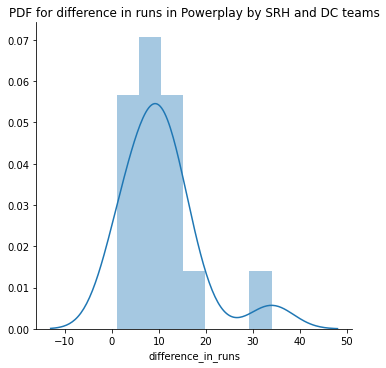

count    15.000000
mean     10.400000
std       8.024961
min       1.000000
25%       6.000000
50%       9.000000
75%      12.500000
max      34.000000
Name: difference_in_runs, dtype: float64


In [67]:
sns.FacetGrid(df_DCSRH_powerplay,size=5) \
   .map(sns.distplot, "difference_in_runs") \
   .add_legend();

plt.title("PDF for difference in runs in Powerplay by SRH and DC teams")
plt.show();


print(df_DCSRH_powerplay['difference_in_runs'].describe())

**Conclusion :-**



1.   Probability is very high for runs difference 5 to 10 and all the values are lies between 1 to 20 except one which is 34 runs diffrence.
2.   Median is also 9 and 75% of the values are less than 12

So i am predicting in today match their difference in runs lies between 6-14.



### Q5) How many extras will be bowled in a total during the match by both teams? Consider all extras - byes,legbyes, no-balls, wides and penalties too?

Extras will be calculated as 

wide + 4runs   = 5wides

noball + 4runs = 1no-ball

bye + 4runs    = 4 byes

legbye + 4runs = 4 legbyes

penaltyruns    = 0

-----------------------------

total_extras   = 14


In our dataset we have extra_runs column it is the combination of all extras that mentioned in question but in our dataset in no-ball column we have values like 2,3,5 these ae definetly outliers. I.e why i am going with below approach.

In [89]:
#Taking SRH vs DC matches
df_DCSRH = df_deliveries[((df_deliveries['batting_team'] == 'Delhi Capitals') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')) |
                         ((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Delhi Capitals'))] 

#Taking all extras from SRH vs Dc matches
#I am giving noball_runs == 1 not >=1. Thats what i explained in text cell.
df_extras = df_DCSRH[(df_DCSRH['wide_runs'] >= 1) | (df_DCSRH['bye_runs'] >= 1) | (df_DCSRH['legbye_runs'] >= 1) |
                     (df_DCSRH['noball_runs'] == 1) | (df_DCSRH['penalty_runs'] >= 1)]

total_extras = df_extras.groupby('match_id')['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs'].apply(lambda x : x.astype(int).sum())

total_extras['extras'] = total_extras['wide_runs'] + total_extras['bye_runs'] + total_extras['legbye_runs'] + total_extras['noball_runs'] + total_extras['penalty_runs']

total_extras.head(2)

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extras
match_id,,,,,,
21,3,3,3,2,0,11
39,4,0,6,1,0,11


In [90]:
#Now taking central tendency
total_extras['extras'].describe()

count    15.000000
mean     11.866667
std       3.377799
min       5.000000
25%       9.500000
50%      11.000000
75%      14.000000
max      17.000000
Name: extras, dtype: float64

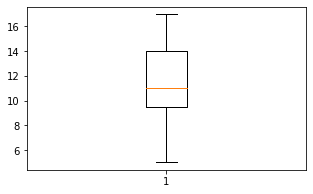

In [92]:
fig = plt.figure(figsize =(5, 3)) 
# Creating plot 
plt.boxplot(total_extras['extras']) 
# show plot 
plt.show() 

**Conclusion :-**

By looking at above obsrvations and boxplot, i can say 75% values or third quartile values are less than 14 extras. Maximum extras in match is 17. So i am predictiong in today match they will consider 13-18 extras.